In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import os
import glob
IMG_SIZE = 224

In [ ]:
img_dir = r"/content/drive/MyDrive/Colab Notebooks/images"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X = []
for img in files:
    img = cv2.imread(img)
    img = cv2.resize(img,(IMG_SIZE,IMG_SIZE))
    X.append(np.array(img))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X

[array([[[135, 108,  54],
         [158, 124,  45],
         [179, 146,  79],
         ...,
         [ 41,  43,  42],
         [ 43,  41,  40],
         [ 37,  36,  34]],
 
        [[128, 105,  53],
         [154, 120,  41],
         [149, 119,  53],
         ...,
         [ 46,  46,  45],
         [ 42,  44,  41],
         [ 35,  37,  34]],
 
        [[127, 108,  63],
         [153, 121,  43],
         [153, 126,  63],
         ...,
         [ 44,  41,  41],
         [ 47,  49,  45],
         [ 36,  38,  34]],
 
        ...,
 
        [[ 40,  48,  71],
         [ 41,  49,  72],
         [ 42,  50,  73],
         ...,
         [ 43,  62,  99],
         [ 46,  67, 101],
         [ 47,  67, 102]],
 
        [[ 44,  52,  75],
         [ 43,  51,  74],
         [ 41,  49,  72],
         ...,
         [ 42,  62,  99],
         [ 47,  66, 103],
         [ 48,  67, 104]],
 
        [[ 44,  52,  75],
         [ 41,  50,  73],
         [ 39,  47,  70],
         ...,
         [ 45,  64, 102],
  

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
#extract coordinates from the xml 
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMG_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMG_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMG_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMG_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/annotations/'
text_files = ['/content/drive/MyDrive/Colab Notebooks/annotations/'+ i for i in sorted(os.listdir(path))]
y = []
for i in text_files:
    y.append(resizeannotation(i))

In [ ]:
resizeannotation("/content/drive/MyDrive/Colab Notebooks/annotations/Cars0.xml")

[187, 144, 101, 104]

In [ ]:
y[:5]

[[187, 144, 101, 104],
 [146, 144, 75, 115],
 [169, 147, 78, 4],
 [119, 109, 98, 95],
 [134, 164, 93, 150]]

In [ ]:
np.array(X).shape

(433, 224, 224, 3)

In [ ]:
np.array(y).shape

(433, 4)

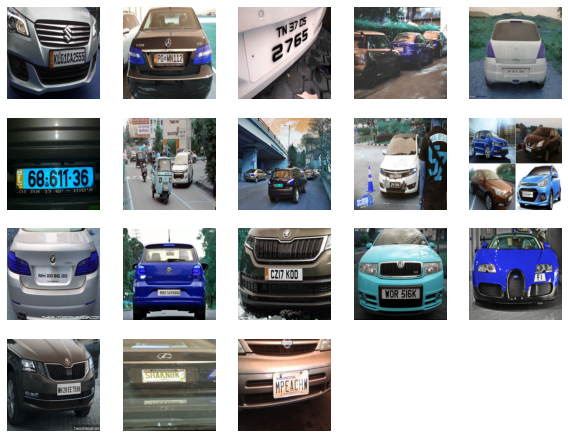

In [ ]:
plt.figure(figsize=(10,20))

for i in range(0,18):
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

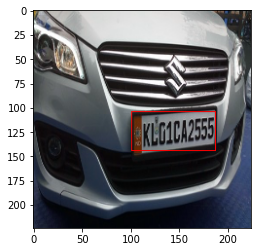

In [ ]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(255, 0, 0))
plt.imshow(image)
plt.show()

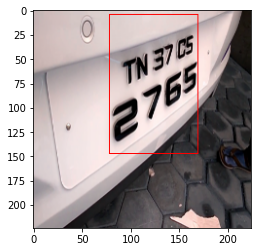

In [ ]:
image = cv2.rectangle(X[2],(y[2][0],y[2][1]),(y[2][2],y[2][3]),(255, 0, 0))
plt.imshow(image)
plt.show()

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X = X/255
y = y/255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5)

In [ ]:
X_train.shape

(173, 224, 224, 3)

In [ ]:
X_test.shape

(87, 224, 224, 3)

In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout

from keras.applications.vgg19 import VGG19

In [ ]:
X_train[0].shape

(224, 224, 3)

In [ ]:
import cv2
from os import listdir,makedirs
from os.path import isfile,join

path = r'/content/drive/MyDrive/Colab Notebooks/images' # Source Folder
dstpath = r'/content/drive/MyDrive/Colab Notebooks/test' # Destination Folder

try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in asme folder")

# Folder won't used
files = [f for f in listdir(path) if isfile(join(path,f))] 

for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    except:
        print ("{} is not converted".format(image))

In [ ]:
img_dir = r"/content/drive/MyDrive/Colab Notebooks/test"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X1 = []
for img in files:
    img = cv2.imread(img)
    X1.append(np.array(img))

In [ ]:
X1

[array([[[ 63,  63,  63],
         [116, 116, 116],
         [108, 108, 108],
         ...,
         [ 39,  39,  39],
         [ 34,  34,  34],
         [ 38,  38,  38]],
 
        [[ 67,  67,  67],
         [107, 107, 107],
         [101, 101, 101],
         ...,
         [ 32,  32,  32],
         [ 42,  42,  42],
         [ 27,  27,  27]],
 
        [[ 76,  76,  76],
         [104, 104, 104],
         [ 98,  98,  98],
         ...,
         [ 35,  35,  35],
         [ 38,  38,  38],
         [ 28,  28,  28]],
 
        ...,
 
        [[ 55,  55,  55],
         [ 56,  56,  56],
         [ 57,  57,  57],
         ...,
         [ 76,  76,  76],
         [ 76,  76,  76],
         [ 76,  76,  76]],
 
        [[ 58,  58,  58],
         [ 59,  59,  59],
         [ 58,  58,  58],
         ...,
         [ 75,  75,  75],
         [ 76,  76,  76],
         [ 76,  76,  76]],
 
        [[ 58,  58,  58],
         [ 58,  58,  58],
         [ 58,  58,  58],
         ...,
         [ 73,  73,  73],
  

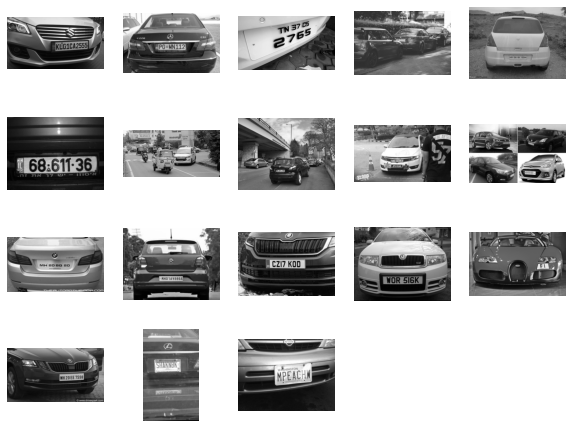

In [ ]:
plt.figure(figsize=(10,20))

for i in range(0,18):
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X1[i])

In [ ]:
def image_read(image1, image2, title1 = "", title2 = ""):
    fig = plt.figure(figsize = (15, 15))
    ax1 = fig.add_subplot(121)
    ax1.imshow(image1, cmap = "gray")
    ax1.set(xticks = [], yticks = [], title = title1)
    ax2 = fig.add_subplot(122)
    ax2.imshow(image2, cmap = "gray")
    ax2.set(xticks = [], yticks = [], title = title2)

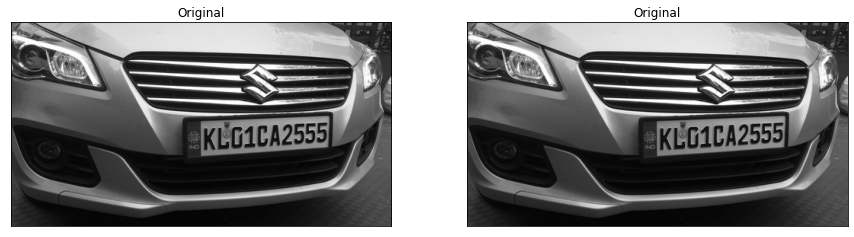

In [ ]:
from skimage.io import imread
path = "/content/drive/MyDrive/Colab Notebooks/test/Cars0.png"
image = cv2.imread(path)
plot_image = image_read(image, image, title1 = "Original", title2 = "Original")


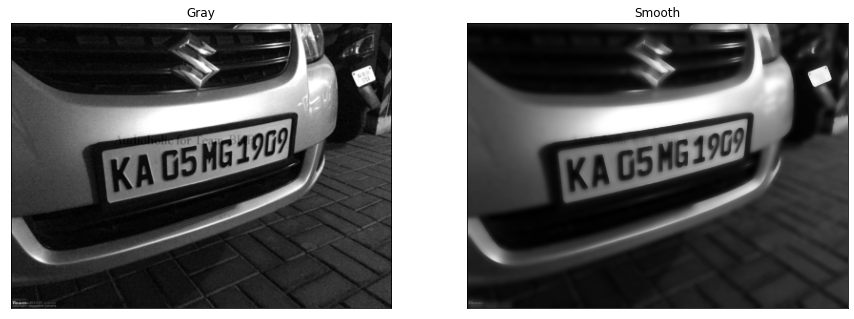

In [ ]:
smooth = cv2.bilateralFilter(gray, 9, 75, 75)

image_read(gray, smooth, title1 = "Gray", title2 = "Smooth")

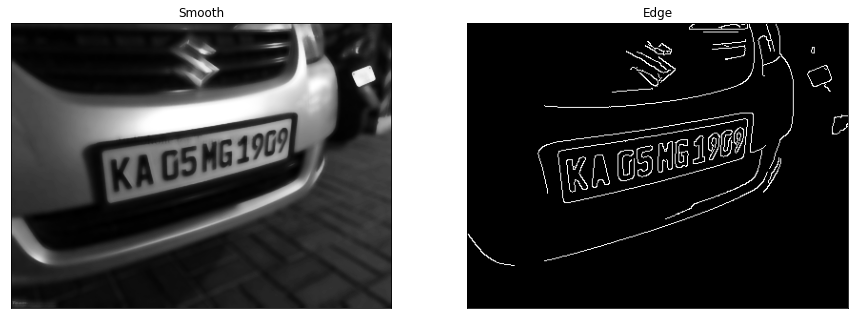

In [ ]:
edge = cv2.Canny(smooth, 70, 400)
image_read(smooth, edge, title1 = "Smooth", title2 = "Edge")

In [ ]:
model = Sequential()
model.add(VGG19(weights="imagenet", include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

80150528/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                         

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
6/6 [==============================] - 192s 35s/step - loss: 0.0967 - accuracy: 0.4740 - val_loss: 0.0886 - val_accuracy: 0.5202
Epoch 2/100
6/6 [==============================] - 190s 35s/step - loss: 0.0859 - accuracy: 0.5549 - val_loss: 0.0877 - val_accuracy: 0.5202
Epoch 3/100
6/6 [==============================] - 190s 35s/step - loss: 0.0786 - accuracy: 0.5549 - val_loss: 0.0727 - val_accuracy: 0.5202
Epoch 4/100
6/6 [==============================] - 190s 35s/step - loss: 0.0458 - accuracy: 0.5838 - val_loss: 0.0209 - val_accuracy: 0.6243
Epoch 5/100
6/6 [==============================] - 190s 34s/step - loss: 0.0174 - accuracy: 0.5954 - val_loss: 0.0220 - val_accuracy: 0.5145
Epoch 6/100
6/6 [==============================] - 190s 35s/step - loss: 0.0111 - accuracy: 0.6821 - val_loss: 0.0146 - val_accuracy: 0.7168
Epoch 7/100
6/6 [==============================] - 190s 35s/step - loss: 0.0073 - accuracy: 0.7572 - val_loss: 0.0131 - val_accuracy: 0.7803
Epoch 8/100
6

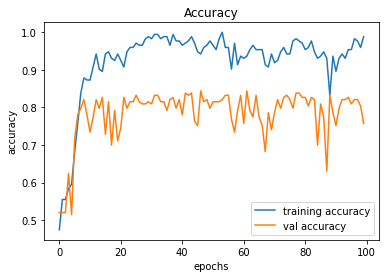

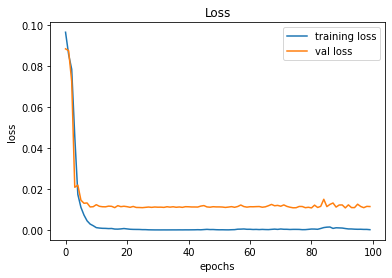

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 49s 15s/step - loss: 0.0118 - accuracy: 0.7241


[0.011774559505283833, 0.7241379022598267]

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions[:5]

array([[0.3828389 , 0.55003774, 0.26544285, 0.5260349 ],
       [0.3333641 , 0.59274375, 0.22196767, 0.5416019 ],
       [0.5122474 , 0.63403684, 0.34668732, 0.585064  ],
       [0.4776722 , 0.45025557, 0.34845972, 0.37337023],
       [0.5413155 , 0.63578427, 0.4069658 , 0.51862556]], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

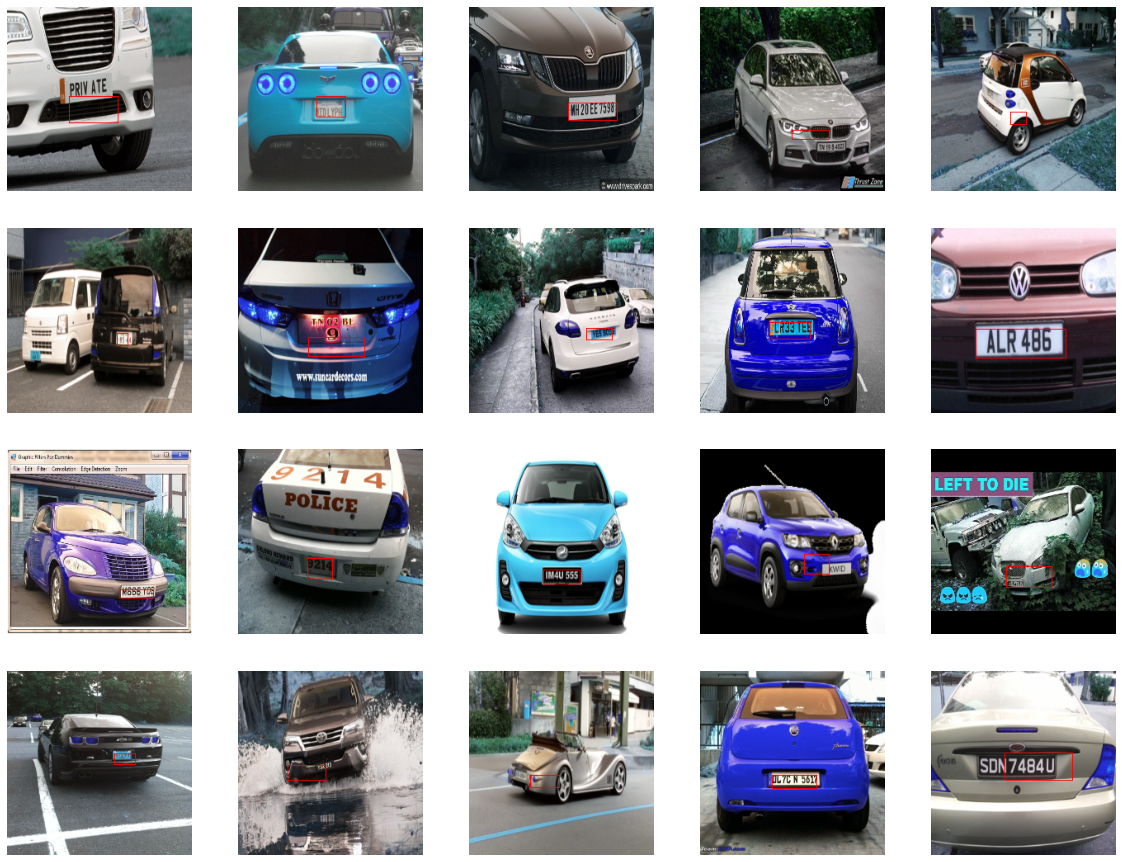

In [ ]:
plt.figure(figsize=(20,40))
for i in range(20,40) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = predictions[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(255, 0, 0))
    plt.imshow(image)

Number plate extraction

In [ ]:
! pip install imutils

In [ ]:
!pip install easyocr

     |████████████████████████████████| 70.8 MB 18 kB/s 
     |████████████████████████████████| 47.6 MB 123 kB/s 


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


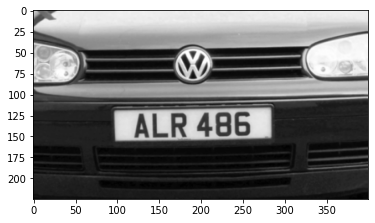

In [ ]:
img = cv2.imread('/content/drive/MyDrive/nndl proj/images/Cars14.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

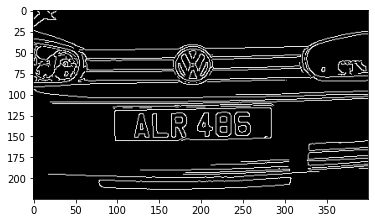

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 100) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [ ]:
location

array([[[284, 117]],

       [[ 98, 119]],

       [[ 98, 155]],

       [[283, 152]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

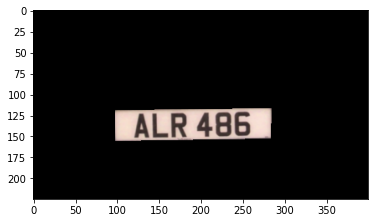

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

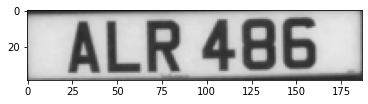

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[19, 0], [167, 0], [167, 39], [19, 39]], 'ALR 486', 0.744181244266092)]

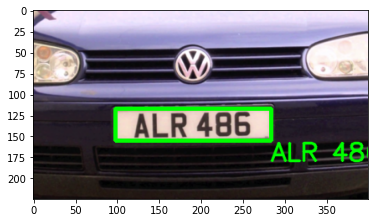

In [ ]:
text = str.upper(result[0][1])
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [ ]:
y=["Czip kod","P6J03JLO126","TN 99F2378","@LZC N 5617","DZIZ YXR","ALR 486","PGoMN112","DZIZ YXR"]

In [ ]:

if "ALR 486" in y:
  print("Car can be allowed")
else:
  print("Car cannot be allowed")

Car can be allowed
